#import pandas as pd;

#lecture du fichier
#with open("titanic-passengers.csv",'r') as file:
#    new_file=file.read()
    

#remplacer les ; en  et les , en espace vide
#new_file=new_file.replace(","," ")
#new_file=new_file.replace(";",",")


#ecriture dans le fichier
#with open("titanic-passengers.csv",'w') as file:
#    file.write(new_file)


In [1]:
#importation de la bibliothéque pandas
import pandas as pd;

#création de dataframe from csv
data=pd.read_csv("titanic-passengers.csv",encoding='ISO-8859-1')
#affichage des 5 premieres données avec leur entete
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
#remplacement de la valeur manquante par la moyenne de tte la colonne age
data['Age'].fillna(data['Age'].mean(),inplace=True)
#convertir le type age( float) en int
data['Age']=data['Age'].astype('int64')

#preparation des données 
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   
data["Sex"]=data["Sex"].map({'male': 1,'female':0})   


data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Collander Mr. Erik Gustaf,1,28,0,0,248740,13.0000,NaN,S
1,76,0,3,Moen Mr. Sigurd Hansen,1,25,0,0,348123,7.6500,F G73,S
2,641,0,3,Jensen Mr. Hans Peder,1,20,0,0,350050,7.8542,NaN,S
3,568,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),0,29,0,4,349909,21.0750,NaN,S
4,672,0,1,Davidson Mr. Thornton,1,31,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,Nasser Mrs. Nicholas (Adele Achem),0,14,1,0,237736,30.0708,NaN,C
887,61,0,3,Sirayanian Mr. Orsen,1,22,0,0,2669,7.2292,NaN,C
888,535,0,3,Cacic Miss. Marija,0,30,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff Mr. Pastcho (""Pentcho"")",1,29,0,0,349215,7.8958,NaN,S


In [3]:
x=data['Cabin']

#remplacer et afficher les valeurs
x.fillna('G6',inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Collander Mr. Erik Gustaf,1,28,0,0,248740,13.0000,G6,S
1,76,0,3,Moen Mr. Sigurd Hansen,1,25,0,0,348123,7.6500,F G73,S
2,641,0,3,Jensen Mr. Hans Peder,1,20,0,0,350050,7.8542,G6,S
3,568,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),0,29,0,4,349909,21.0750,G6,S
4,672,0,1,Davidson Mr. Thornton,1,31,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,Nasser Mrs. Nicholas (Adele Achem),0,14,1,0,237736,30.0708,G6,C
887,61,0,3,Sirayanian Mr. Orsen,1,22,0,0,2669,7.2292,G6,C
888,535,0,3,Cacic Miss. Marija,0,30,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff Mr. Pastcho (""Pentcho"")",1,29,0,0,349215,7.8958,G6,S


In [4]:
#prediction d'un arbre de décision
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#extraction des features
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y=data['Survived']
#Avant de construire le modèle, séparons 
#le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7,random_state=0)

#Application de l'algorithme
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))



score:0.7291666666666666


In [5]:
#installation de graphviz
#pip install graphviz


DecisionTreeClassifier(max_depth=3)

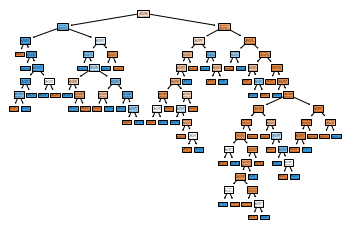

In [6]:
from sklearn import tree

#courbe de l'arbre de décision
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
tree.plot_tree(clf, filled=True)
clf.predict(x_test)
clf.score(x_test,y_test)
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf
#la lecture est  quasi impossible qu'importe si on met min ou max

score:0.7343565525383707


DecisionTreeClassifier(min_samples_leaf=20)

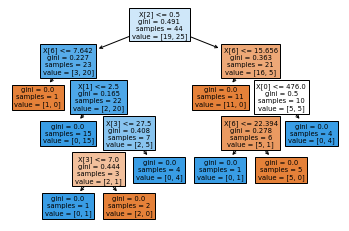

In [7]:
#importation des bibliotheques
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#extraction des features
z=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
w=data['Survived']
z_train, z_test, w_train, w_test = train_test_split(z,w, test_size=0.95,random_state=0)

trees = tree.DecisionTreeClassifier()  
trees.fit(z_train, w_train)   
w_pred=trees.predict(z_test)   
print("score:{}".format(accuracy_score(w_test, w_pred)))

#courbe de l'arbre de décision
clfs=tree.DecisionTreeClassifier()
clfs.fit(z_train,w_train)
tree.plot_tree(clfs, filled=True)
clfs.predict(z_test)
clfs.score(z_test,w_test)
clfs = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clfs
#Voici l’arbre obtenu avec min_samples_leaf=20. 
#Il a plus d’éléments dans les feuilles, 
#donc moins de nœuds et l’arbre est moins profond.
# en plus, on a refait une division apprentissage/test 
#avec 5% des données en apprentissage et 95% test 
#et nous avons plus d'élements dans les feuilles et donc moins de noeuds
#et l'arbre est moins profond
#alors qu'avec les résultats precedent,
#on a fait 70% pour l’apprentissage, 30% pour le test et 
#l'arbre obtenu avec max_depth = 3 mais la lecture etait quasi impossible.




In [8]:
 #importation  des bibliotheques
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn import datasets
import pandas as pd

datas=pd.DataFrame(data)

datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [16]:
#separation apprentissage/test
y = data["Survived"]
x = data[["Survived", "Pclass", "Sex", "Age"]]
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size=0.3, 
                                                     random_state=0)

modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

modele_rf.fit(x_train, y_train)  #Training our model
y_pred=modele_rf.predict(x_test)  #testing our model
#Measure de l'ooccurance du modéle
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
#Calcule du score
print("score:{}".format(accuracy_score(y_test, y_pred)))

print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, modele_rf.predict(x_test))*100} %")

#nous avons constaté que cette nouvelle précison qui a atteint 100%,
#donc on a une bonne prediction de notre modéle
#contrairement au précédent qui etait à 73% 
#c'est à dire que l'estimation se rapporchez un peu plus de la réalité


Accuracy: 1.0
score:1.0
Le pourcentage de bien classés est de : 100.0 %


In [15]:
from sklearn.metrics import confusion_matrix
#matrice de confusion pour une analyse plus fine
pd.DataFrame(confusion_matrix(y_test, modele_rf.predict(x_test)),
             index = ["Survivant_donné", "donnée_mort"],
             columns = ["Survivant_predit", "mort_predit"])

#On voit ici qu’aucun survivant (survivant_données) 
#n'a été considéré comme mort par le modèle (mort_predit)
#et qu'aucun mort (donnée_mort) 
#n'a été predit comme survivant par le modèle (survivant_predit).

,Survivant_predit,mort_predit
Survivant_donné,167,0
donnée_mort,0,101
